In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

sns.set(color_codes=True)

### 一、绘制线性回归模型的函数
seaborn 中两个主要函数主要用于显示回归确定的线性关系。这些函数，regplot() 和 lmplot()， 之间密切关联，并且共享核心功能

在最简单的调用中，两个函数都绘制了两个变量，x和y，然后拟合回归模型y~x并绘制得到回归线和该回归的 95%置信区间

**主要区别是**
>regplot()接受多种格式的x和y变量，包括简单的 numpy 数组，pandas Series对象，或者作为对传递给data的 pandas DataFrame对象。<br><br>相反，lmplot()将data作为必须参数，x和y变量必须被指定为字符串。这种数据格式被称为"长格式"或"整齐"数据。

d:\soft\_env\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  itemfreq : (K, 2) ndarray


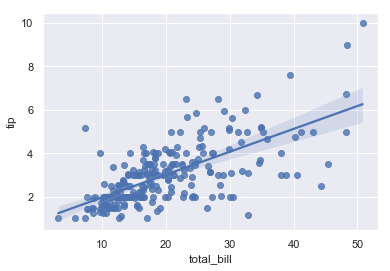

In [11]:
tips = pd.read_csv('seaborn-data/tips.csv')
sns.regplot(x="total_bill", y="tip", data=tips)

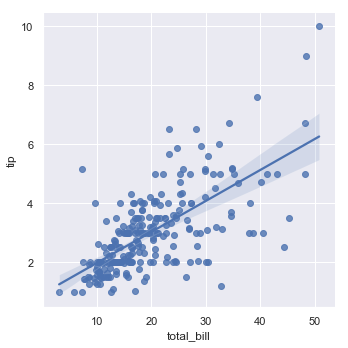

In [4]:
sns.lmplot(x="total_bill", y="tip", data=tips)

当其中一个变量采用离散值时，可以拟合线性回归。但是，这种数据集生成的简单散点图通常不是最优的

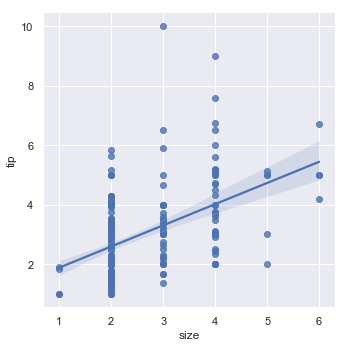

In [5]:
sns.lmplot(x="size", y="tip", data=tips)

第一种向离散值添加随机噪声("抖动")，以使这些值分布更清晰。需要注意的是，抖动仅用于散点图数据，而不会影响回归线本身拟合：

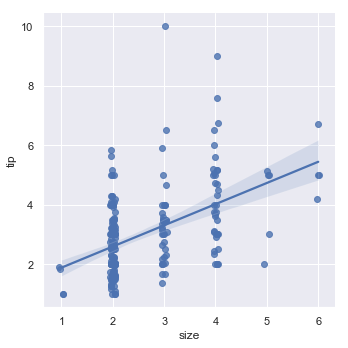

In [6]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05)

第二种选择是综合每个离散箱中的观测值，以绘制集中趋势的估计值和置信区间

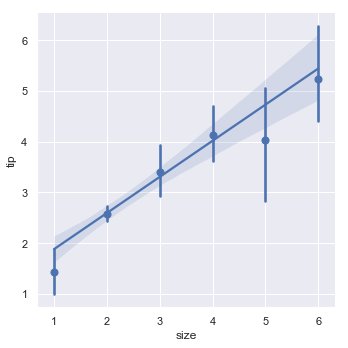

In [7]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

### 二、拟合不同模型
使用的简单线性回归模型非常容易拟合，但是它不适合某些类型的数据集。Anscombe 的四重奏数据集展示了一些实例，其中简单线性回归提供了相同的关系估计，然而简单的视觉检查清楚地显示了差异。


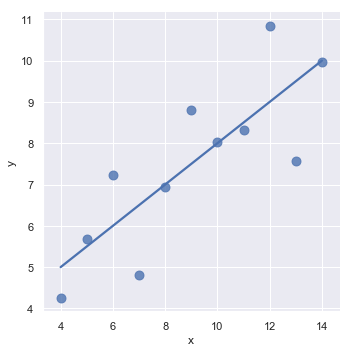

In [4]:
anscombe = pd.read_csv('seaborn-data/anscombe.csv')

sns.lmplot(x="x",y="y",data=anscombe.query("dataset=='I'"),ci=None,scatter_kws={"s":80})

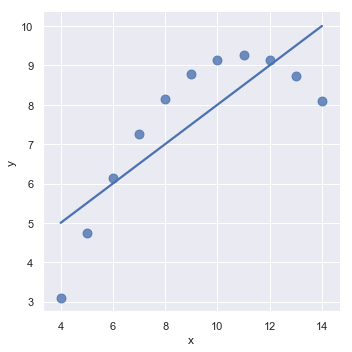

In [5]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

在这些存在高阶关系的情况下，regplot()和lmplot()可以拟合多项式回归模型来探索数据集中的简单非线性趋势

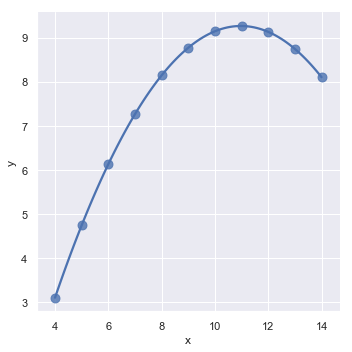

In [6]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80})

"离群值"观察引起的另一个问题是，除了研究中的主要关系之外，由于某种原因导致的偏离

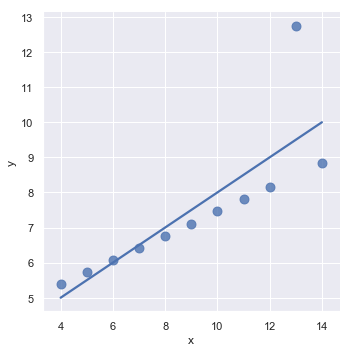

In [7]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80})

在存在异常值的情况下，拟合稳健回归可能会很有用，该回归使用了一种不同的损失函数来降低相对较大的残差的权重

这里遇到异常ModuleNotFoundError: No module named 'statsmodels'，需要安装statsmodels库
>pip install statsmodels -i https://pypi.tuna.tsinghua.edu.cn/simple/

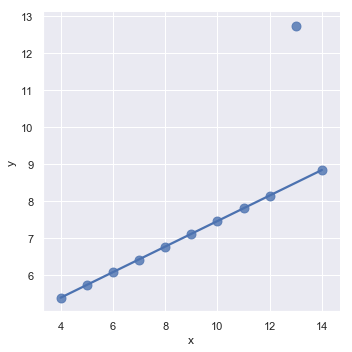

In [10]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),robust=True, ci=None, scatter_kws={"s": 80})

当y变量是二进制时，简单线性回归也"有效"，但提供了难以置信的预测

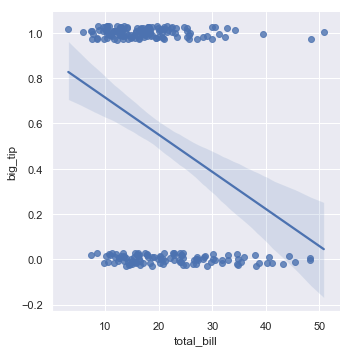

In [12]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03)

在这种情况下的解决方案是拟合逻辑回归，使得回归线对给定值x显示的估计概率y=1

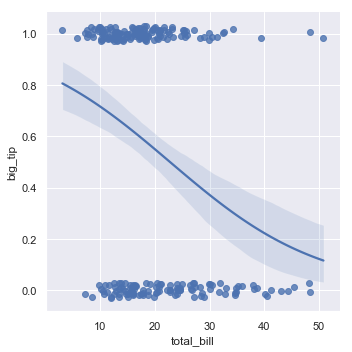

In [13]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)

逻辑回归估计比简单回归计算密集程度更高(稳健回归也是如此)，并且由于回归线周围的置信区间是使用自举程度计算，你可能希望关闭它来达到更快的迭代(使用ci=None)。

一种完全不同的方法是使用lowess smoother拟合非参数回归。

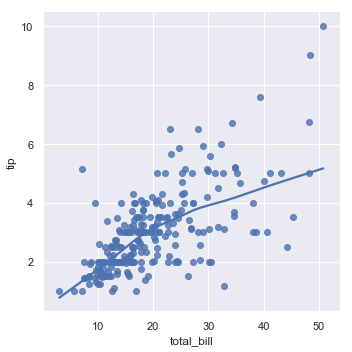

In [14]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True)

residplot() 函数可以用作检查简单回归模型是否适合数据集的有效工具。它拟合并删除简单的线性回归，然后绘制每个观察值的残差值。理想情况下，这些值应随机散步在y=0周围

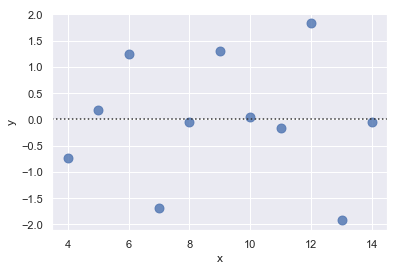

In [15]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80})

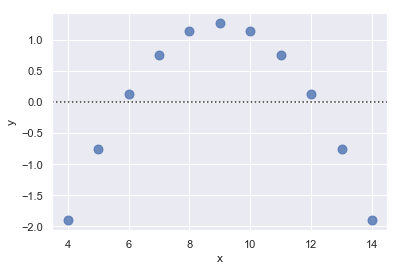

In [16]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80})

### 三、其他变量关系
通常，一个更有趣的问题是"这两个变量之间的关系如何随第三个变量的变化而变化？"这就是regplot()和lmplot()的区别所在。**regplot()**总是表现单一关系, **lmplot()**把regplot()和 FacetGrid结合，以提供一个简单的界面，显示"facet"图的线性回归，使你可以探索与最多三个其他分类变量的交互。

d:\soft\_env\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  itemfreq : (K, 2) ndarray


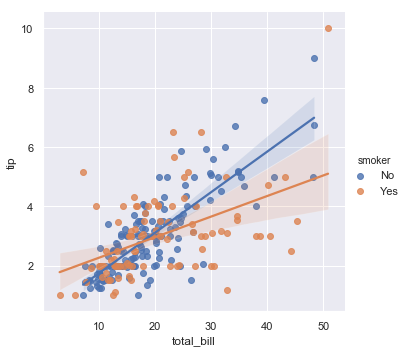

In [24]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

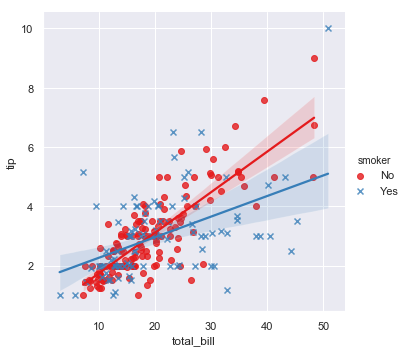

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

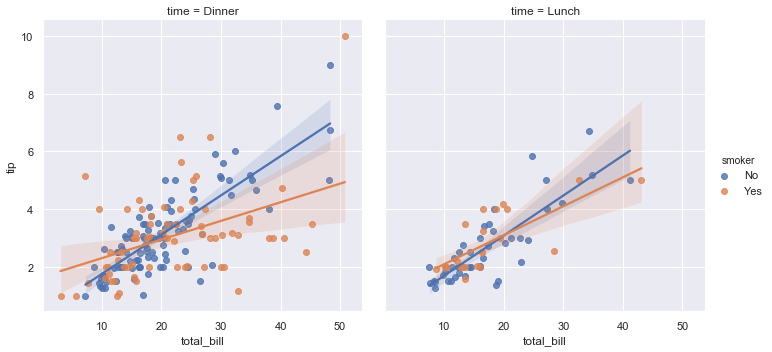

In [26]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

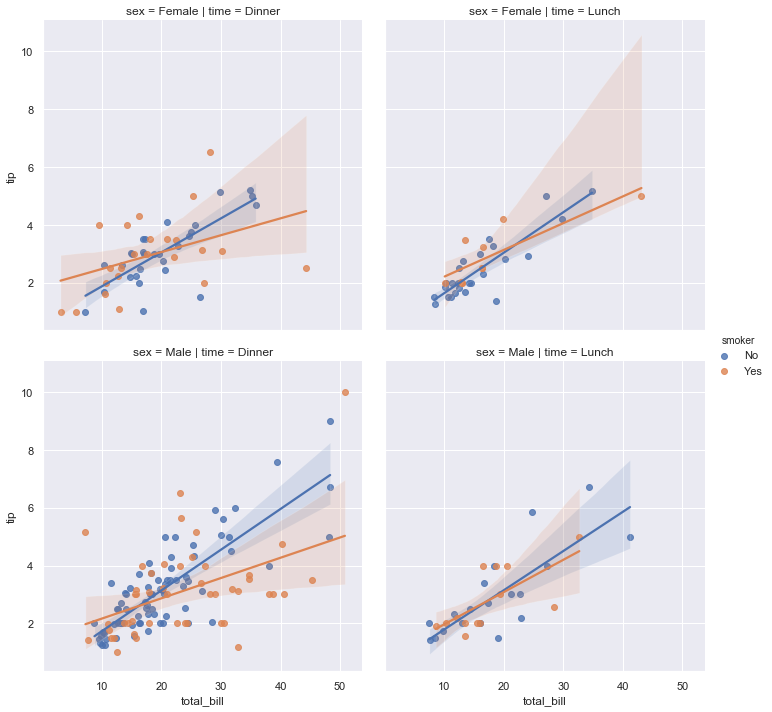

In [27]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips)

### 四、控制绘图的大小和形状
我们注意到regplot()和lmplot()生成的默认图看起来相同，但却具有不同的大小和形状。这是因为regplot()是一个"轴级"函数，它绘制在特定的轴上。这意味着你可以自己制作多面板图形并精确控制回归图的位置。如果没有明确提供轴对象，它只使用"当前活动"轴，

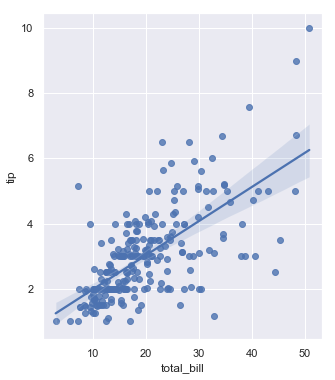

In [29]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax)

相比之下，lmplot()图的大小和形状是通过lmplot()接口，使用size和aspect参数控制，这些参数适用于绘图中的每个facet，而不是整个图形本身

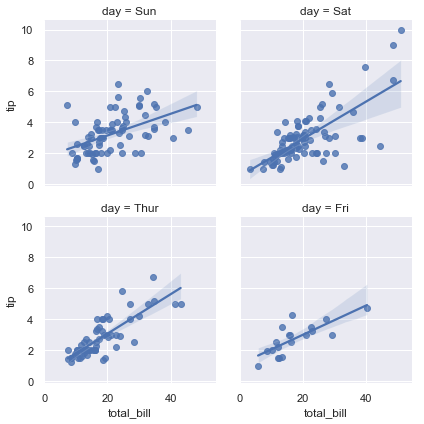

In [30]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3)

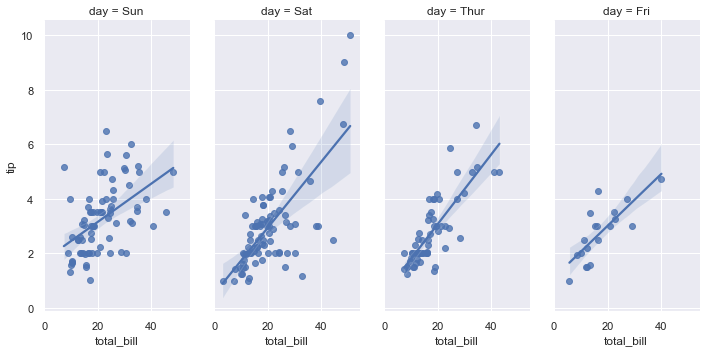

In [31]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5)

### 五、其他情境中的绘制回归
更复杂的图中使用regplot()。第一个是我们在发行教程中引入的jointplot()。除了前面讨论的绘制风格，jointplot() 可以使用regplot()通过传递kind="reg"来显示轴上的线性回归拟合

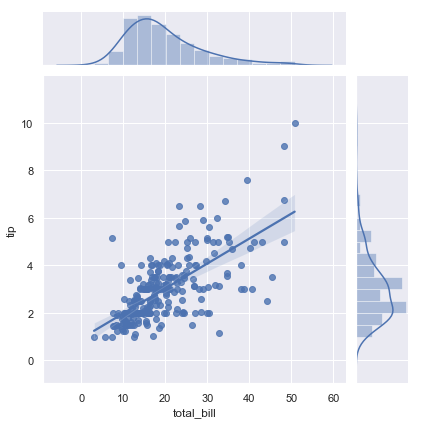

In [32]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

使用pairplot()函数与kind="reg"将 regplot()和PairGrid 结合起来，来显示数据集中变量的线性关系。请注意这与lmplot()的不同之处。在下图中，两个轴在第三变量上的两个级别上没有显示相同的关系；相反，PairGrid()用于显示数据集中变量的不同配对之间的多个关系

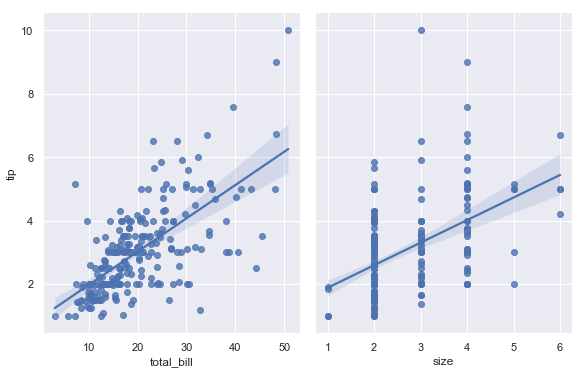

In [33]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg")

像lmplot()，但不像jointplot()，额外的分类变量调节是通过hue参数内置在函数pairplot()中

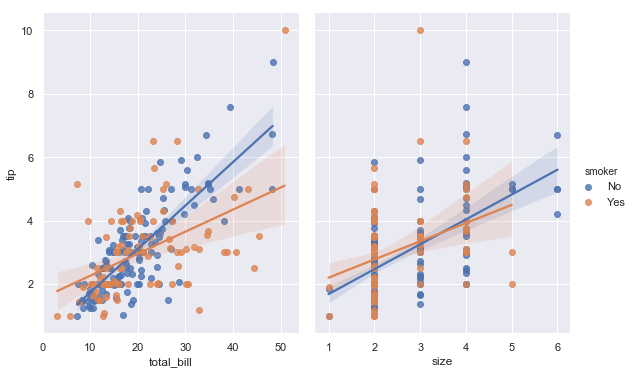

In [35]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg")